Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [2]:
path_to_train = '../assignment_1/zip.train'
path_to_test = '../assignment_1/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 8, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 8, y_test == 9)]

In [3]:
y_train = y_train[np.logical_or(y_train == 8, y_train == 9)]
y_test = y_test[np.logical_or(y_test == 8, y_test == 9)]

In [4]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


In [5]:
X_train.shape

(1186, 256)

In [6]:
y_test.ndim

1

In [7]:
X_test.ndim

2

(90,)


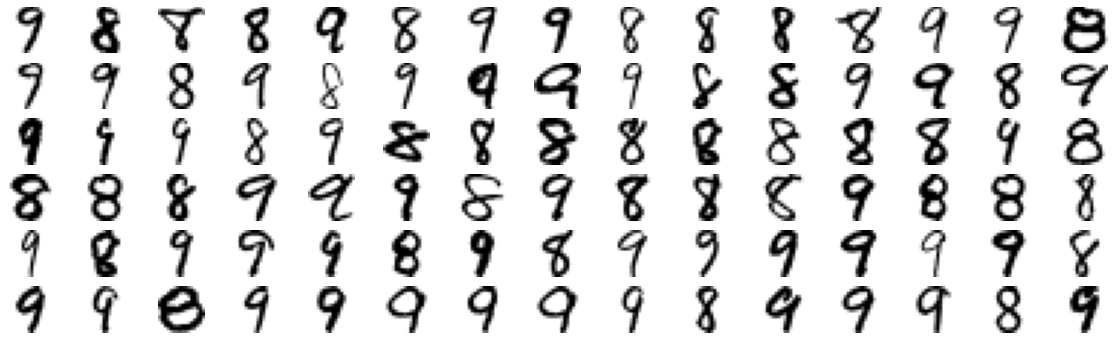

In [8]:
show_numbers(X_train)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [39]:
# Logistic Regression
class LogisticRegression():
    def __init__(self):
        self.learning_rate = 0.001
        self.iterations = 10
        self.w = 0
    
    def fit(self, my_X, my_y):
        """
        Minimize cross entropy loss
        """
        y = np.copy(my_y)
        X = np.copy(my_X)
        self.check_input(X, y)

        # one-hot encoding the labels
        label_0 = np.unique(y)[0]
        label_1 = np.unique(y)[1]  
        y[y == label_0] = 0
        y[y == label_1] = 1

        # Initialize fit
        feature_number = X.shape[1]
        w = np.ones(shape=(feature_number))
        b = np.zeros(shape=1)
        w = np.concatenate((w, b))
        self.w = w

        for iteration in range(self.iterations):
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            

        print(loss)

        return None

    def loss(self, y, yhat):
        return - np.dot(y,np.log(yhat))

    def check_input(self, X, y):
        if not isinstance(X,np.ndarray):
            print(f"Numpy array expected! Instead a {type(X)} was passed")
        if X.ndim != 2:
            print(f"Two dimentional X array expected! \
                Instead a {X.ndim}-dimentional X array was passed")
        if not isinstance(y,np.ndarray):
            print(f"Numpy array expected! Instead a {type(y)} was passed")
        if y.ndim != 1:
            print(f"One dimentional y array expected! \
                Instead a {y.ndim}-dimentional y array was passed")
        if y.shape[0] != X.shape[0]:
            print(f"X and y have incompatible shape")
        if np.unique(y).shape !=(2,):
            print(f"Found more than two unique values in y.\
                Try softmax instead of Logistic Regression")
        
    def predict(self,X):
        '''
        Calculate predicted value yhat for a given self.w 
        yhat = 1/(1+exp(-Xw))
        X can be 1-D array, contaning the feature values or
        X can be 2-d array contaning the featture values in different rows
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X = np.concatenate((X, bias),axis=1)
        Xdotw = np.dot(X, self.w)
        return 1/(1+np.exp(-Xdotw))

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)

90796.06400006093


Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?

In [41]:
from sklearn.linear_model import LogisticRegression as SkLR

In [42]:
y_train

array([8., 8., 8., ..., 8., 8., 9.])

In [45]:
sklr = SkLR()
sklr.fit(X_train,y_train)
sklr.predict(X_test)

array([9., 9., 9., 9., 8., 9., 8., 8., 9., 9., 9., 8., 9., 8., 9., 8., 9.,
       8., 9., 9., 9., 9., 9., 8., 8., 8., 9., 9., 9., 8., 9., 9., 9., 9.,
       8., 8., 8., 8., 8., 8., 9., 9., 8., 8., 9., 8., 9., 8., 8., 8., 9.,
       8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 8., 8., 8., 9., 8., 8., 8.,
       8., 9., 8., 8., 9., 8., 8., 9., 8., 9., 8., 8., 8., 8., 9., 8., 8.,
       9., 9., 9., 8., 9., 9., 9., 8., 8., 8., 9., 8., 9., 8., 9., 8., 9.,
       8., 9., 8., 8., 8., 9., 8., 9., 9., 8., 8., 9., 9., 9., 9., 8., 9.,
       8., 8., 8., 8., 9., 8., 8., 9., 9., 8., 8., 9., 8., 9., 8., 8., 9.,
       9., 9., 9., 9., 9., 8., 9., 8., 9., 9., 9., 8., 8., 9., 8., 8., 8.,
       8., 8., 9., 8., 9., 8., 9., 9., 8., 9., 8., 9., 8., 9., 8., 9., 9.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 8., 9., 9., 9., 8., 8.,
       8., 9., 9., 9., 9., 8., 8., 8., 9., 9., 8., 8., 9., 8., 8., 9., 8.,
       8., 9., 8., 9., 9., 9., 9., 8., 9., 8., 9., 8., 9., 9., 9., 8., 9.,
       9., 9., 9., 9., 8.